## Business Problem

Saran is a frequent traveler who often books flight tickets online. While searching for tickets on the same route, he notices that flight prices vary significantly across airlines, departure timings, and days of travel.

For the same journey, Saran observes cases where:
- One airline offers fares around ₹4,500
- Another prices the same trip above ₹9,000
- Some flights take only 1.5 hours
- Others take more than 5 hours
- Weekend fares seem higher than weekday fares
- Evening departures appear priced differently than morning flights

This raises several questions in Saran's mind:

- Why are some airlines more expensive than others?
- Are weekend flights actually costlier?
- Does longer duration always mean higher prices?
- Which airlines offer the best value for money on this route?
- At what time of day should I fly to get cheaper fares?

These questions impact not only individual consumers but also reflect how airlines compete on pricing, scheduling, and service differentiation. Like Saran, many passengers struggle to understand the pricing dynamics of flights and make informed travel decisions.


## Business Problem Statement

Flight ticket prices are influenced by multiple factors including airline choice, day of travel, flight duration, and departure timing. This creates uncertainty for consumers who want to optimize travel costs, and also highlights competitive pricing strategies used by airlines in the same market.

To reduce ambiguity and uncover pricing patterns, this project uses Exploratory Data Analysis (EDA) to:

- Compare prices across airlines
- Examine how weekend vs weekday flights differ
- Analyze duration vs fare relationships
- Study departure hour price variations
- Segment flights into meaningful fare tiers
- Identify best value carriers for consumers

Insights from this analysis benefit both consumers (in making better purchase decisions) and provide visibility into competitive pricing behavior among airlines operating on the same route.


In [34]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
import seaborn
import re
import time

In [30]:
options=Options()
options.add_argument('--start-maximized')

service=Service(ChromeDriverManager().install())

driver=webdriver.Chrome(service=service,options=options)

In [31]:
url = "https://www.air.irctc.co.in/"

In [32]:
driver.get(url)

In [68]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Hyderabad')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-471"]/li[1]'))
)
first_dest.click()

In [70]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Bom")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-472"]/li[1]'))
)
first_dest.click()

In [71]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()


In [72]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [85]:
# Hyd to Bom

In [ ]:
names = []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

Arrival = []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

Departure = []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

Time= []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

price= []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

From = []

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

To = []
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

Date = []
for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[1]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])  
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [71]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[7]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

['Air India', 'Air India', 'Air India', 'Air India', 'Air India', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'Air India Express', 'Air India Express', 'Air India Express', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India Express', 'Air India Express', 'Air India Express', 'Air India Express', 'Alliance Air', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'StarAir', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India Express', 'Air India Express', 'Air India Express', 'Air India Express', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'StarAir', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India Express', 'Air India Express', 'Air India Express', 'Air India Express', 'Alliance Air', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'IndiGo', 'StarAir', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India', 'Air India Express', 'Air India Express', 'Air India Express', 'Air India Express', 'Alliance 

In [86]:
# Hyd to goa

In [74]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Hyderabad')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-1214"]/li[1]'))
)
first_dest.click()

In [79]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("gox")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-1215"]/li'))
)
first_dest.click()

In [80]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()


In [81]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[5]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [107]:
# Hyd to Delhi

In [87]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Hyderabad')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-1431"]/li[2]'))
)
first_dest.click()

In [92]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("delhi")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-126"]/li[3]'))
)
first_dest.click()

In [89]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

In [90]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[17]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [182]:
#Hyd to blr

In [93]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Hyderabad')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-125"]/li[3]'))
)
first_dest.click()


In [94]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Blr")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-126"]/li'))
)
first_dest.click()

In [95]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

In [96]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[14]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [295]:
# mumbai to bengaluru

In [98]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Mumbai')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-125"]/li[2]'))
)
first_dest.click()

In [99]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Blr")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-126"]/li'))
)
first_dest.click()



In [100]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()



In [101]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[15]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [292]:
# Delhi to Mumbai

In [103]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('delhi')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li'))
)
first_dest.click()

In [104]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Bom")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[2]'))
)
first_dest.click()

In [105]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

In [106]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[11]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [6]:
# mumbai to goa

In [107]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Bom')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[2]'))
)
first_dest.click()


In [108]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("gox")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li'))
)
first_dest.click()

In [109]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()



In [110]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[7]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [33]:
# Del to blr

In [113]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('delhi')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[3]'))
)
first_dest.click()

In [114]:
To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Bom")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li'))
)
first_dest.click()


In [115]:
date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()


In [ ]:
search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[17]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [103]:
#blr to chennai

In [117]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('blr')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("MAA")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[1]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[11]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [140]:
# mumbai to chennai

In [119]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Bom')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[2]'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("MAA")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[2]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[16]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [ ]:
#hyd to chennai

In [120]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('Hyderabad')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[1]'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("MAA")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[1]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[13]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [235]:
# blr to hyd

In [121]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('blr')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Hyderabad")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[1]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[11]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [268]:
# chennai to hyderabad

In [122]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('MAA')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[1]'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("Hyderabad")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[1]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[11]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [310]:
# blr to goa

In [123]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('blr')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[1]'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("gox")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li[1]'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[11]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [345]:
# mumbai to kolkata

In [125]:
origin = driver.find_element(By.XPATH,'//*[@id="stationFrom"]')
origin.send_keys('MAA')
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-476"]/li[2]'))
)
first_dest.click()

To = driver.find_element(By.XPATH,'//*[@id="stationTo"]')
To.send_keys("ccu")
first_dest = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,'//*[@id="ui-id-477"]/li'))
)
first_dest.click()

date_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[3]/datepickermodifi/div/div[2]/div[2]/table/tbody/tr[4]/td[1]/span'
date = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, date_xpath))
)
date.click()

search_xpath = f'//*[@id="carouselExampleInterval"]/div[1]/div/div[2]/div[2]/form/div[6]/button'
search = WebDriverWait(driver,10).until(
    EC.element_to_be_clickable((By.XPATH, search_xpath))
)
search.click()


In [ ]:
for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[1]/div[2]/b"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        names.append(txt)
    except:
        break

print(names)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Arrival.append(txt)
    except:
        break

print(Arrival)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Departure.append(txt)
    except:
        break
print(Departure)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[4]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        Time.append(txt)
    except:
        break
print(Time)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[5]/label"
        txt = driver.find_element(By.XPATH, xp).text.strip()
        price.append(txt)
    except:
        break
print(price)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[2]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        From.append(txt)
    except:
        break
print(From)

for n in range(3,40):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[{n}]/div[1]/div[3]/span"
        txt = driver.find_element(By.XPATH,xp).text.strip()
        To.append(txt)
    except:
        break
print(To)

for n in range(1,6):
    try:
        xp = f"/html/body/app-root/app-oneway/div/main/div/div/div[2]/div[1]/div/div/div[17]/a/span[1]"
        txt = driver.find_element(By.XPATH, xp).text.strip()

        match = re.findall(r'(\d{1,2}\s+[A-Za-z]{3,})', txt)
        if match:
            Date.append(match[0])   
        else:
            Date.append(txt)

    except:
        break

print(Date)

In [23]:
from itertools import zip_longest

rows = list(zip_longest(
    names,
    From,
    To,
    Date,
    Arrival,
    Departure,
    Time,
    price 
))

In [27]:
df = pd.DataFrame(rows, columns=[
    'Airline',
    'From',
    'To',
    'Date',
    'Arrival',
    'Departure',
    'Duration',
    'Price'
])

In [ ]:
df.to_csv("Project_data.csv", index=False)

### Data Understanding and Preprocessing

#### 1) Actions Performed :
+ Dataset contains flight listings scraped from an online travel booking website.
  
+ Each row represents one available flight option for a selected travel date.

+ Columns represent pricing, timing, airline information and travel characteristics.

#### 2) Key Columns

+ Airline – Operating airline for the flight (e.g., IndiGo, Air India, Vistara).

+ From / To – Origin and destination airports along with city codes (e.g., Hyderabad (HYD) → Mumbai (BOM)).

+ Date – Scheduled travel date for the flight listing.

+ Departure / Arrival Time – Scheduled departure and arrival times for the flight.

+ Duration – Total time taken for journey including possible layovers (e.g., 1h 55m).

+ Price – Final listed ticket fare for the flight (includes base fare + relevant charges).

### Loading the data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\saran\web scraping\Project_data.csv")

In [4]:
df.head()

,Airline,From,To,Date,Arrival,Departure,Duration,Price
0,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,17:30,19:25,1h 55m,₹ 5038
1,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,20:35,22:30,1h 55m,₹ 5038
2,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,22:20,00:10,1h 50m,₹ 5038
3,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,19:30,00:35,5h 05m,₹ 9075
4,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,20:00,00:35,4h 35m,₹ 9075


In [5]:
df.shape

(2992, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    2820 non-null   object
 1   From       2820 non-null   object
 2   To         2820 non-null   object
 3   Date       2992 non-null   object
 4   Arrival    2820 non-null   object
 5   Departure  2820 non-null   object
 6   Duration   2820 non-null   object
 7   Price      2820 non-null   object
dtypes: object(8)
memory usage: 187.1+ KB


### Data Cleaning

In [7]:
df = df.dropna(subset=['Airline', 'From', 'To', 'Price', 'Duration'])
df = df.reset_index(drop=True)

In [8]:
df.isnull().sum()

Airline      0
From         0
To           0
Date         0
Arrival      0
Departure    0
Duration     0
Price        0
dtype: int64

In [9]:
# Removing Rupee symbol from price and converting price column into integer
df['Price'] = df['Price'].str.replace('₹', '', regex=False)
df['Price'] = df['Price'].str.replace(' ', '', regex=False)
df['Price'] = df['Price'].astype(int)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    2820 non-null   object
 1   From       2820 non-null   object
 2   To         2820 non-null   object
 3   Date       2820 non-null   object
 4   Arrival    2820 non-null   object
 5   Departure  2820 non-null   object
 6   Duration   2820 non-null   object
 7   Price      2820 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 176.4+ KB


In [11]:
# Converting the time duration into minutes for better understanding
df['hours'] = df['Duration'].str.extract(r'(\d+)h')
df['mins'] = df['Duration'].str.extract(r'(\d+)m')
df['hours'] = df['hours'].fillna(0).astype(int)
df['mins'] = df['mins'].fillna(0).astype(int)
df['Duration_Minutes'] = df['hours']*60 + df['mins']
df.drop(['hours', 'mins'], axis=1, inplace=True)

In [12]:
# Creating Route column for insights 
df['Route'] = df['From'] + ' → ' + df['To']

In [13]:
df['Arrival_Hour'] = pd.to_datetime(df['Arrival'], format='%H:%M').dt.hour
df['Departure_Hour'] = pd.to_datetime(df['Departure'], format='%H:%M').dt.hour
df.head()

,Airline,From,To,Date,Arrival,Departure,Duration,Price,Duration_Minutes,Route,Arrival_Hour,Departure_Hour
0,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,17:30,19:25,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),17,19
1,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,20:35,22:30,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),20,22
2,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,22:20,00:10,1h 50m,5038,110,Hyderabad (HYD) → Mumbai (BOM),22,0
3,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,19:30,00:35,5h 05m,9075,305,Hyderabad (HYD) → Mumbai (BOM),19,0
4,Air India,Hyderabad (HYD),Mumbai (BOM),15 Jan,20:00,00:35,4h 35m,9075,275,Hyderabad (HYD) → Mumbai (BOM),20,0


In [14]:
df['Date'] = df['Date'] + ' 2026'
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')
df['Type_of_Day'] = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
df['Type_of_Day'] = df['Type_of_Day'].map({True:'Weekend', False:'Weekday'})

In [15]:
df.head()

,Airline,From,To,Date,Arrival,Departure,Duration,Price,Duration_Minutes,Route,Arrival_Hour,Departure_Hour,Type_of_Day
0,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,17:30,19:25,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),17,19,Weekday
1,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,20:35,22:30,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),20,22,Weekday
2,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,22:20,00:10,1h 50m,5038,110,Hyderabad (HYD) → Mumbai (BOM),22,0,Weekday
3,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,19:30,00:35,5h 05m,9075,305,Hyderabad (HYD) → Mumbai (BOM),19,0,Weekday
4,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,20:00,00:35,4h 35m,9075,275,Hyderabad (HYD) → Mumbai (BOM),20,0,Weekday


In [16]:
bins = [0, 5000, 9000, 15000, df['Price'].max()]
labels = ['Budget','Standard','Premium','Luxury']
df['Price_Segment'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

In [17]:
bins = [0, 120, 240, df['Duration_Minutes'].max()]
labels = ['Short','Medium','Long']
df['Duration_Type'] = pd.cut(df['Duration_Minutes'], bins=bins, labels=labels, right=False)

In [18]:
df.head()

,Airline,From,To,Date,Arrival,Departure,Duration,Price,Duration_Minutes,Route,Arrival_Hour,Departure_Hour,Type_of_Day,Price_Segment,Duration_Type
0,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,17:30,19:25,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),17,19,Weekday,Standard,Short
1,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,20:35,22:30,1h 55m,5038,115,Hyderabad (HYD) → Mumbai (BOM),20,22,Weekday,Standard,Short
2,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,22:20,00:10,1h 50m,5038,110,Hyderabad (HYD) → Mumbai (BOM),22,0,Weekday,Standard,Short
3,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,19:30,00:35,5h 05m,9075,305,Hyderabad (HYD) → Mumbai (BOM),19,0,Weekday,Premium,Long
4,Air India,Hyderabad (HYD),Mumbai (BOM),2026-01-15,20:00,00:35,4h 35m,9075,275,Hyderabad (HYD) → Mumbai (BOM),20,0,Weekday,Premium,Long


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           2820 non-null   object        
 1   From              2820 non-null   object        
 2   To                2820 non-null   object        
 3   Date              2820 non-null   datetime64[ns]
 4   Arrival           2820 non-null   object        
 5   Departure         2820 non-null   object        
 6   Duration          2820 non-null   object        
 7   Price             2820 non-null   int64         
 8   Duration_Minutes  2820 non-null   int64         
 9   Route             2820 non-null   object        
 10  Arrival_Hour      2820 non-null   int32         
 11  Departure_Hour    2820 non-null   int32         
 12  Type_of_Day       2820 non-null   object        
 13  Price_Segment     2819 non-null   category      
 14  Duration_Type     2819 n

In [20]:
df.describe(include='all')

,Airline,From,To,Date,Arrival,Departure,Duration,Price,Duration_Minutes,Route,Arrival_Hour,Departure_Hour,Type_of_Day,Price_Segment,Duration_Type
count,2820,2820,2820,2820,2820,2820,2820,2820.000000,2820.000000,2820,2820.000000,2820.000000,2820,2819,2819
unique,6,5,7,NaN,218,225,196,NaN,NaN,13,NaN,NaN,2,4,3
top,Air India,Hyderabad (HYD),Chennai (MAA),NaN,22:30,01:00,1h 15m,NaN,NaN,Hyderabad (HYD) → Chennai (MAA),NaN,NaN,Weekday,Standard,Long
freq,864,1077,715,NaN,72,68,147,NaN,NaN,275,NaN,NaN,1930,1386,1248
mean,NaN,NaN,NaN,2026-01-22 06:21:57.446808320,NaN,NaN,NaN,7319.773759,305.256028,NaN,12.852837,12.125532,NaN,NaN,NaN
min,NaN,NaN,NaN,2026-01-15 00:00:00,NaN,NaN,NaN,2040.000000,60.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2026-01-18 00:00:00,NaN,NaN,NaN,4853.000000,115.000000,NaN,7.000000,7.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2026-01-22 00:00:00,NaN,NaN,NaN,6404.000000,175.000000,NaN,13.000000,12.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2026-01-25 00:00:00,NaN,NaN,NaN,8760.000000,425.000000,NaN,19.000000,18.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,2026-02-10 00:00:00,NaN,NaN,NaN,25929.000000,1660.000000,NaN,23.000000,23.000000,NaN,NaN,NaN


In [21]:
df['Price_Segment'].value_counts()

Price_Segment
Standard    1386
Budget       771
Premium      553
Luxury       109
Name: count, dtype: int64

In [22]:
df.describe(include='all')

,Airline,From,To,Date,Arrival,Departure,Duration,Price,Duration_Minutes,Route,Arrival_Hour,Departure_Hour,Type_of_Day,Price_Segment,Duration_Type
count,2820,2820,2820,2820,2820,2820,2820,2820.000000,2820.000000,2820,2820.000000,2820.000000,2820,2819,2819
unique,6,5,7,NaN,218,225,196,NaN,NaN,13,NaN,NaN,2,4,3
top,Air India,Hyderabad (HYD),Chennai (MAA),NaN,22:30,01:00,1h 15m,NaN,NaN,Hyderabad (HYD) → Chennai (MAA),NaN,NaN,Weekday,Standard,Long
freq,864,1077,715,NaN,72,68,147,NaN,NaN,275,NaN,NaN,1930,1386,1248
mean,NaN,NaN,NaN,2026-01-22 06:21:57.446808320,NaN,NaN,NaN,7319.773759,305.256028,NaN,12.852837,12.125532,NaN,NaN,NaN
min,NaN,NaN,NaN,2026-01-15 00:00:00,NaN,NaN,NaN,2040.000000,60.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2026-01-18 00:00:00,NaN,NaN,NaN,4853.000000,115.000000,NaN,7.000000,7.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2026-01-22 00:00:00,NaN,NaN,NaN,6404.000000,175.000000,NaN,13.000000,12.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2026-01-25 00:00:00,NaN,NaN,NaN,8760.000000,425.000000,NaN,19.000000,18.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,2026-02-10 00:00:00,NaN,NaN,NaN,25929.000000,1660.000000,NaN,23.000000,23.000000,NaN,NaN,NaN


### Univaraiate Analysis

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

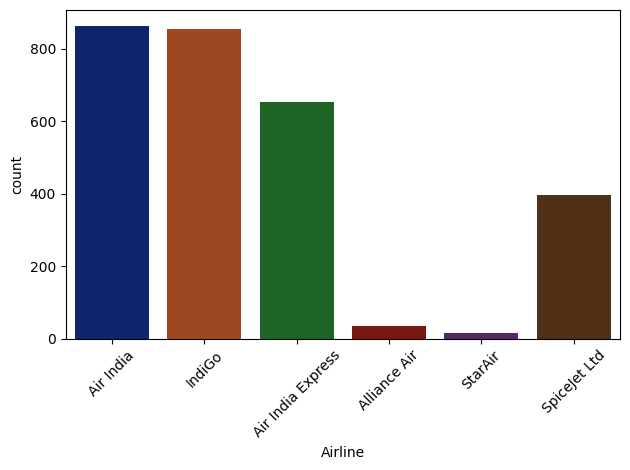

In [24]:
sns.countplot(x='Airline', data=df,palette='dark')
plt.xticks(rotation=45)
plt.tight_layout()

**Key insight :**  IndiGo and Air India operate the highest number of flights,whereas Alliance Air and Star Air have very limited presence. This shows stronger competition between leading carriers and niche participation from smaller airlines.

In [25]:
df['Price'].describe()

count     2820.000000
mean      7319.773759
std       3386.865316
min       2040.000000
25%       4853.000000
50%       6404.000000
75%       8760.000000
max      25929.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

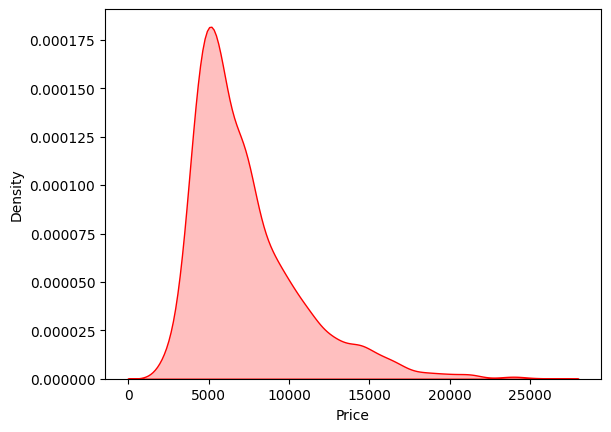

In [26]:
sns.kdeplot(df['Price'],fill = True,color='Red')

**Key insight :** Flight fares are mostly concentrated in lower to mid-tier price ranges, with fewer premium-priced flights. This suggests competitive pricing behavior with occasional higher fare offerings depending on route and schedule.


In [27]:
df['Duration_Minutes'].describe()

count    2820.000000
mean      305.256028
std       279.604833
min        60.000000
25%       115.000000
50%       175.000000
75%       425.000000
max      1660.000000
Name: Duration_Minutes, dtype: float64

<Axes: xlabel='Duration_Minutes', ylabel='Count'>

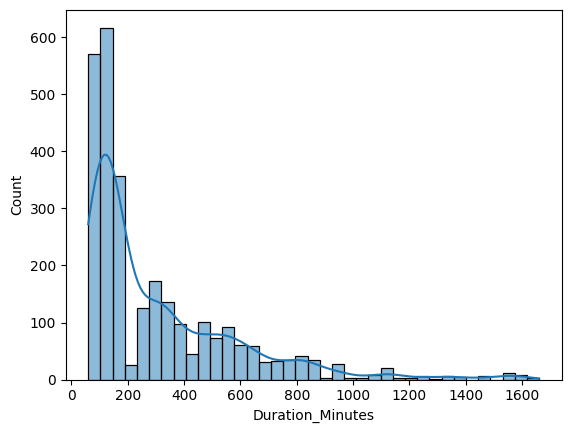

In [28]:
sns.histplot(df['Duration_Minutes'], kde=True)

**Key insight :** Most flights fall within short to medium duration bands, which is consistent with the domestic nature of the routes. Longer-duration flights also appear, possibly due to indirect flights, connecting itineraries, or less efficient schedules.


<Axes: xlabel='Departure_Hour', ylabel='count'>

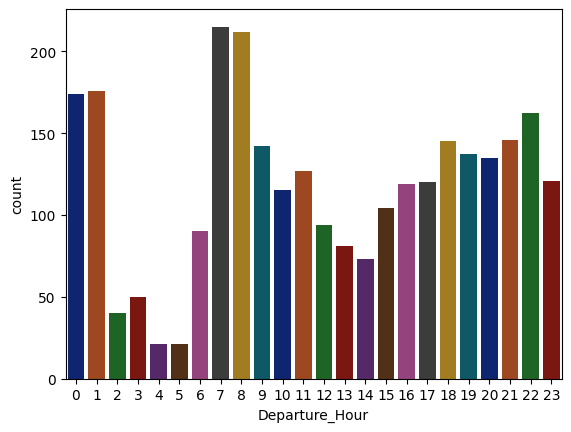

In [29]:
sns.countplot(x='Departure_Hour', data=df,palette='dark')

**Key Insight:** There are clear peaks in flight departures during the morning (around 7–9 AM) and evening (around 6–9 PM). Fewer flights operate in early night and post-midnight hours. This indicates that airlines schedule more flights during passenger-preferred travel windows.

<Axes: ylabel='count'>

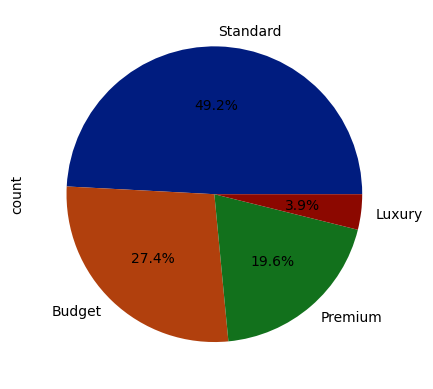

In [30]:
colors = sns.color_palette("dark")
df['Price_Segment'].value_counts().plot(kind='pie',colors = colors,autopct='%1.1f%%')

**Key Insight:** Nearly half of the flights fall under the "Standard" segment, followed by "Budget" and "Premium". "Luxury" flights form a very small minority. This indicates that the majority of flights are priced in affordable ranges rather than premium brackets.


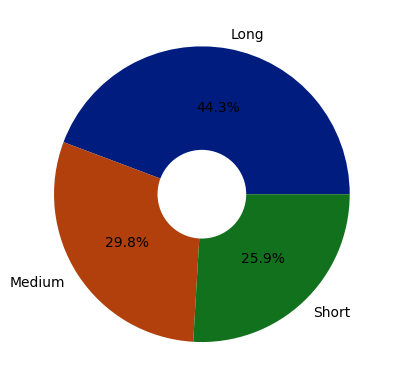

In [31]:
colors = sns.color_palette("dark")

ax = df['Duration_Type'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
centre = plt.Circle((0,0), 0.30, fc='white')
ax.add_artist(centre)
plt.ylabel('')
plt.show()

**Key Insight :** Most flights fall within short to medium duration ranges. Longer flights also appear but are fewer in number, likely due to indirect or less efficient routes.

### Bi variate Analysis

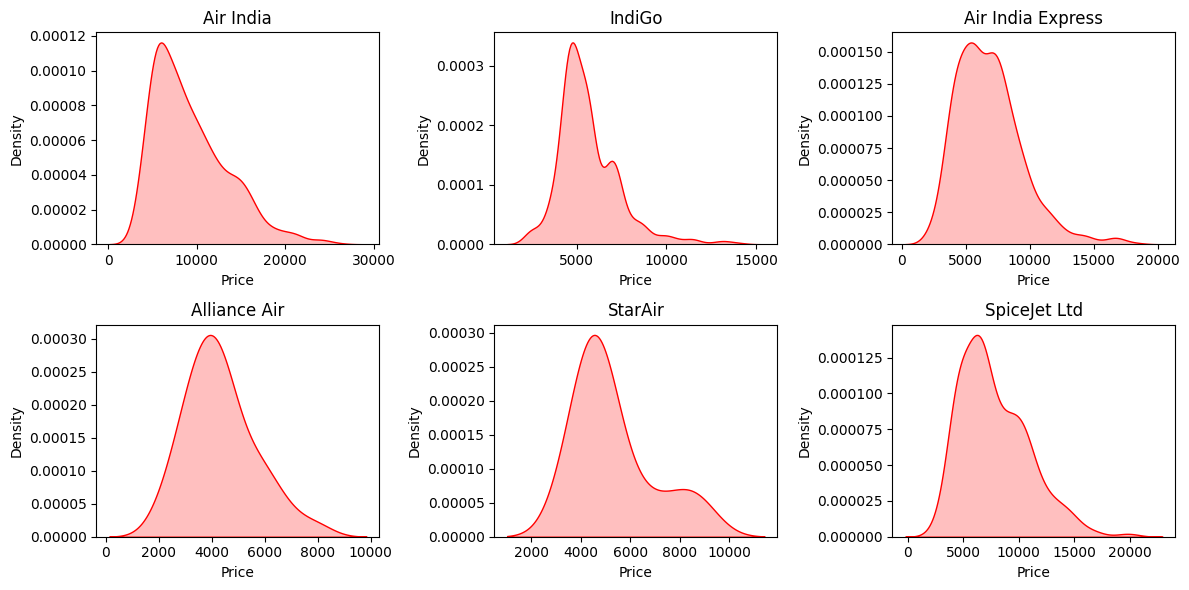

In [32]:
airlines = df['Airline'].unique()

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sns.kdeplot(df[df['Airline']==airlines[0]]['Price'], fill=True, color='red')
plt.title(airlines[0])

plt.subplot(2,3,2)
sns.kdeplot(df[df['Airline']==airlines[1]]['Price'], fill=True, color='red')
plt.title(airlines[1])

plt.subplot(2,3,3)
sns.kdeplot(df[df['Airline']==airlines[2]]['Price'], fill=True, color='red')
plt.title(airlines[2])

plt.subplot(2,3,4)
sns.kdeplot(df[df['Airline']==airlines[3]]['Price'], fill=True, color='red')
plt.title(airlines[3])

plt.subplot(2,3,5)
sns.kdeplot(df[df['Airline']==airlines[4]]['Price'], fill=True, color='red')
plt.title(airlines[4])

plt.subplot(2,3,6)
sns.kdeplot(df[df['Airline']==airlines[5]]['Price'], fill=True, color='red')
plt.title(airlines[5])

plt.tight_layout()
plt.show()


**Key Insight:**
Different airlines show different pricing patterns.
Some have tight, consistent pricing, while others have wider spreads including premium fares. Airlines follow different pricing strategies for the same route.

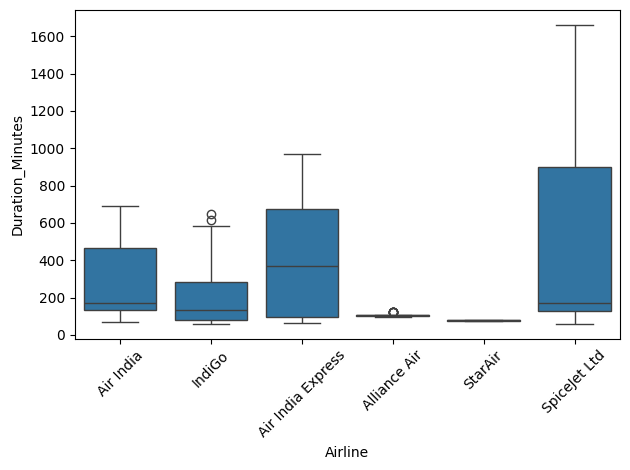

In [33]:
sns.boxplot(x='Airline', y='Duration_Minutes', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insight:** Different airlines show different travel durations; IndiGo & Air India are mostly short and consistent, while SpiceJet & Air India Express have longer and more variable durations.


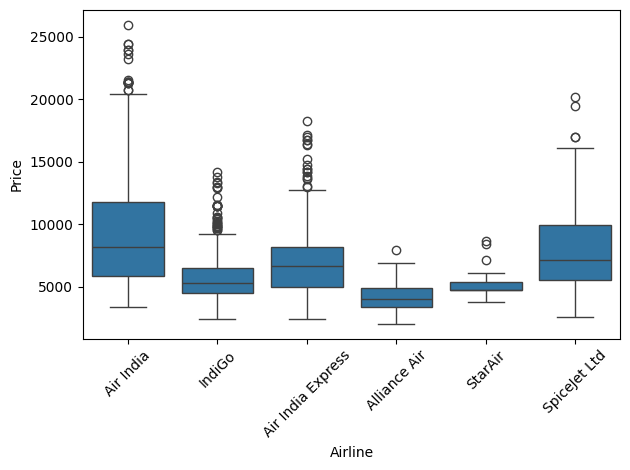

In [34]:
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insight:** Different airlines charge different fare levels; Air India and SpiceJet show higher prices and more variation, while IndiGo and Alliance Air remain lower and more consistent.


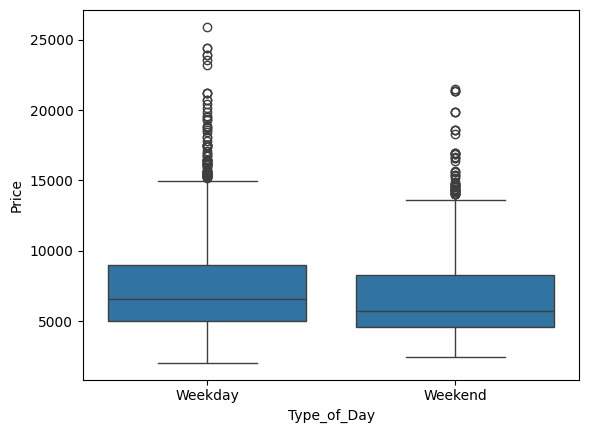

In [35]:
sns.boxplot(x='Type_of_Day', y='Price', data=df)
plt.show()


**Key Insight:** Prices are comparable across weekdays and weekends, suggesting that day type alone does not strongly impact fare levels.


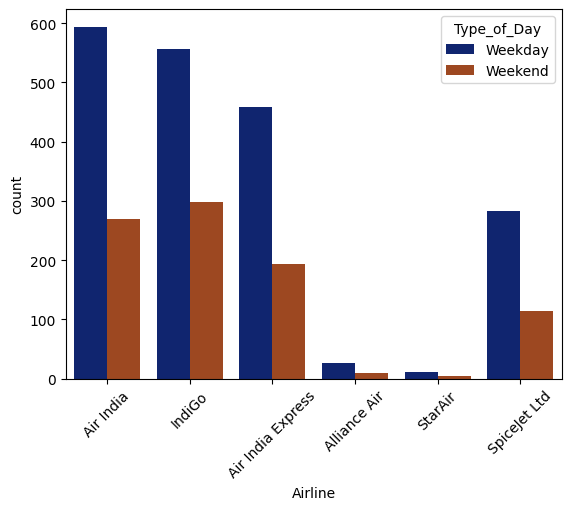

In [36]:
sns.countplot(x='Airline', hue='Type_of_Day',palette='dark', data=df)
plt.xticks(rotation=45)
plt.show()


**Key Insight:** Most flights operate on weekdays across all airlines, with weekends showing noticeably lower frequencies. This is mainly beacause we have very few weekend data also airlines tend to release the tickets with hiked prices based on demand in weekends


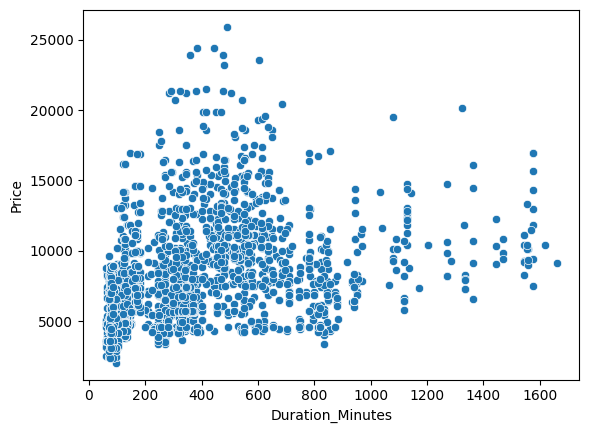

In [37]:
sns.scatterplot(x='Duration_Minutes', y='Price', data=df)
plt.show()

**Key Insight:** Price increases loosely with duration, but the relationship is weak and scattered, indicating that duration alone does not fully determine fare.


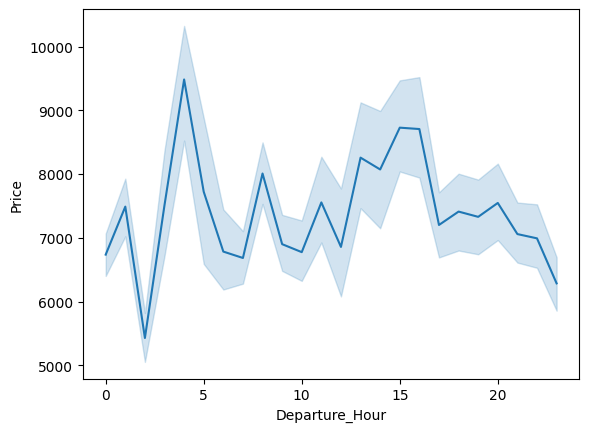

In [38]:
sns.lineplot(x='Departure_Hour', y='Price', data=df)
plt.show()

**Key Insight:** Prices fluctuate with departure time, with higher fares around early morning and mid-afternoon, and slightly lower fares late at night.


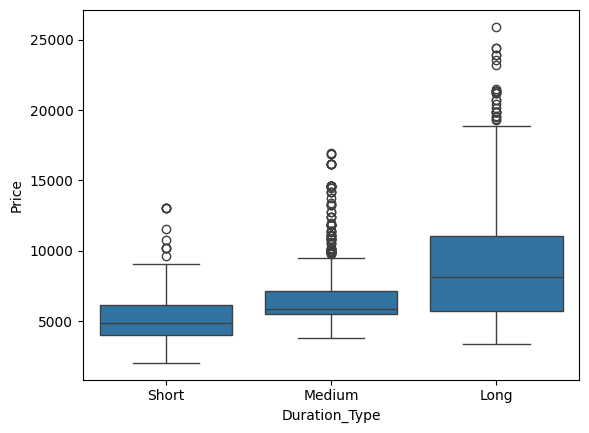

In [39]:
sns.boxplot(x='Duration_Type', y='Price', data=df)
plt.show()

**key insight :**
Longer-duration flights trend toward higher prices, while short-duration flights dominate Budget and Standard segments. 
Flight length contributes to cost structure, but pricing is not strictly proportional to flight time. It is mainly because of many factors such as 2 or 3 stops


### Outlier Detection

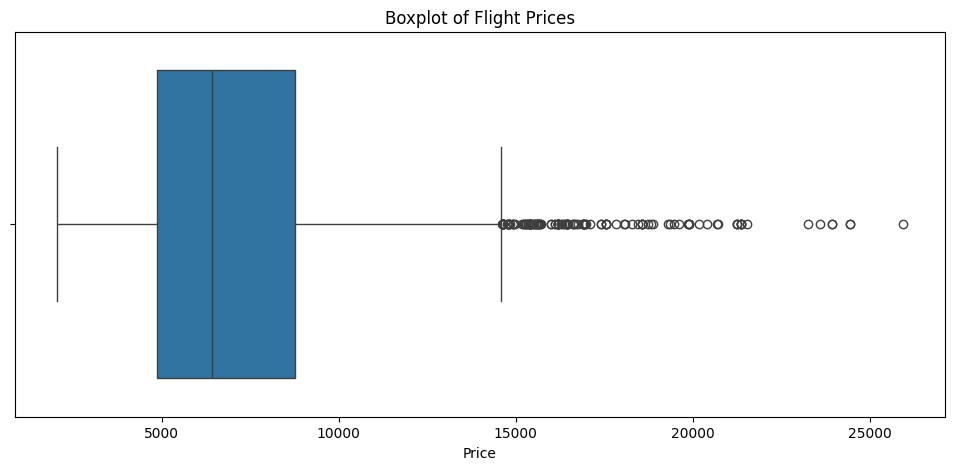

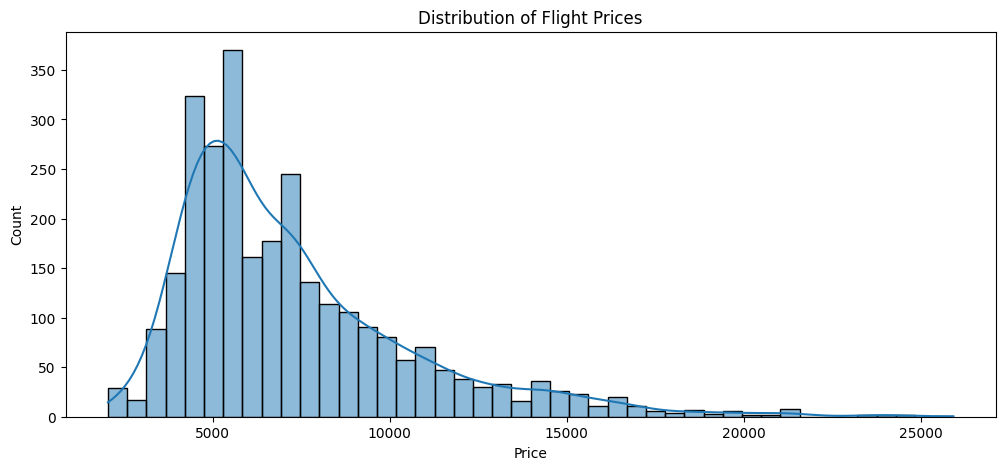

Skewness: 1.5672691472831133
Kurtosis: 3.01810607486522
Price Percentiles: [ 2552.83  3776.    4853.    6404.    8760.   14417.   18796.47]
IQR: 3907.0
Lower Bound: -1007.5
Upper Bound: 14620.5
Outliers Count: 132 (4.68%)


In [47]:
import numpy as np
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Price')
plt.title('Boxplot of Flight Prices')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

print("Skewness:", df['Price'].skew())
print("Kurtosis:", df['Price'].kurt())

percentiles = np.percentile(df['Price'], [1,5,25,50,75,95,99])
print("Price Percentiles:", percentiles)

# Outlier Conclusion
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print("IQR:", iqr)
print("Lower Bound:", lower)
print("Upper Bound:", upper)

outliers = df[(df['Price'] < lower) | (df['Price'] > upper)]
print(f"Outliers Count: {outliers.shape[0]} ({round(outliers.shape[0]/df.shape[0]*100,2)}%)")


**Observation:** Flight prices show high positive skew with meaningful extreme values. Outliers correspond to surge pricing, travel demand, stopovers, premium airlines and last-minute fares. These are not errors and will be retained for hypothesis testing & business interpretation.

## Hypothesis Testing

### Hypothesis 1 (T-Test)
**Question:** Are weekend flights more expensive than weekday flights?

- **Null Hypothesis (H0):** There is no difference in mean ticket price between weekend and weekday flights.
- **Alternate Hypothesis (H1):** Weekend flights have a different mean ticket price compared to weekday flights.


Reject Null Hypothesis. i.e There is relationship between variables


Text(0.5, 1.0, 'H1: Weekend vs Weekday')

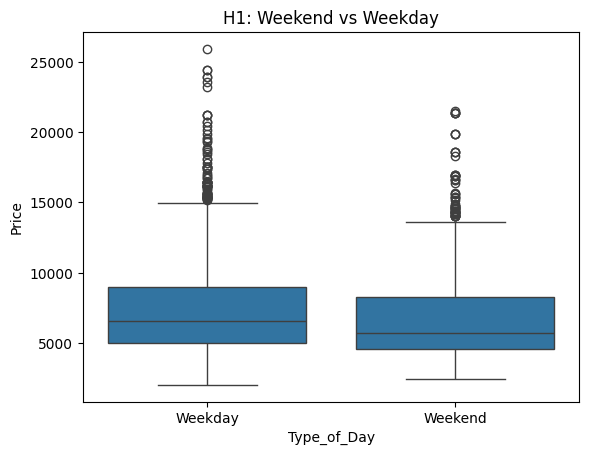

In [40]:
from scipy.stats import ttest_ind

weekend = df[df['Type_of_Day'] == 'Weekend']['Price']
weekday = df[df['Type_of_Day'] == 'Weekday']['Price']

stat, p_value = ttest_ind(weekend, weekday, equal_var=False)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between variables")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between variables")

sns.boxplot(x=df['Type_of_Day'], y=df['Price'])
plt.title('H1: Weekend vs Weekday')

#### Conclusion for Hypothesis 1 :

**Decision:** Reject Null Hypothesis.  

**Statistical Conclusion:** There is a significant difference in flight prices between weekends and weekdays.

**Business Insight:** Weekend flights tend to be priced differently compared to weekdays, suggesting a possible weekend premium or demand-based price adjustment.


### Hypothesis 2 (ANOVA)

**Question:** Do different airlines charge different average ticket prices?

- **Null Hypothesis (H0):** All airlines have equal mean ticket prices.
- **Alternate Hypothesis (H1):** At least one airline has a different mean ticket price.

Reject Null Hypothesis. i.e There is relationship between variables


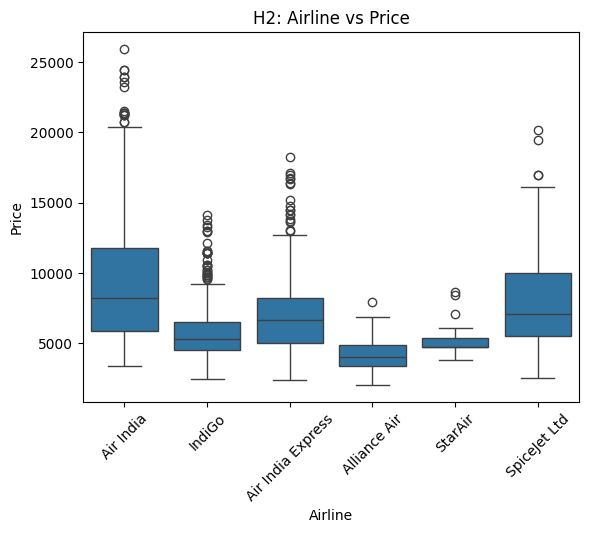

In [50]:
from scipy.stats import f_oneway

groups = []
for airline in df['Airline'].unique():
    groups.append(df[df['Airline'] == airline]['Price'].values)

stat, p_value = f_oneway(*groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between variables")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between variables")

sns.boxplot(x=df['Airline'], y=df['Price'])
plt.title('H2: Airline vs Price')
plt.xticks(rotation=45);

#### Conclusion for Hypothesis 2 :

**Decision**: Reject Null Hypothesis.

**Statistical Conclusion**:
There is a significant difference in flight prices between airlines.
This indicates that mean ticket prices are not equal across all airlines.

**Business Insight**:
Airlines adopt different pricing strategies based on service level, operating costs, and market positioning.
Premium and full-service carriers tend to charge higher fares, while low-cost airlines compete more aggressively on price.
For a traveler like 

### Hypothesis 3 (ANOVA)

**Question:** Do different flight routes have different average ticket prices?  

- **Null Hypothesis (H0):** All routes have equal mean ticket prices.  
- **Alternate Hypothesis (H1):** At least one route has a different mean ticket price.


Reject Null Hypothesis. i.e There is relationship between variables


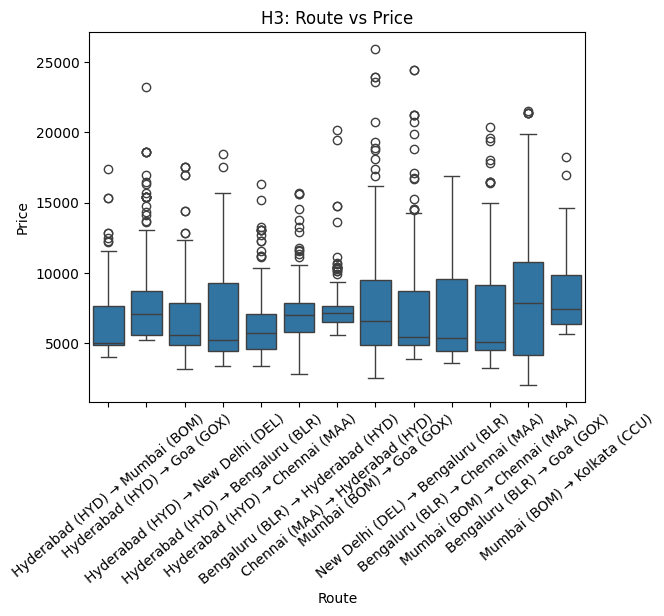

In [56]:
from scipy.stats import f_oneway

groups = []
for r in df['Route'].unique():
    groups.append(df[df['Route'] == r]['Price'].values)

stat, p_value = f_oneway(*groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between variables")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between variables")

sns.boxplot(x=df['Route'], y=df['Price'])
plt.title('H3: Route vs Price')
plt.xticks(rotation=40);

#### Conclusion for Hypothesis 3:

**Decision:** Reject Null Hypothesis.

**Statistical Conclusion:**  
There is a significant difference in flight prices between different routes.  
This indicates that mean ticket prices are not the same across all routes.

**Business Insight:**  
Route-specific factors such as demand, tourism patterns, business travel density, airport fees, and city connectivity influence pricing.  
Busy business corridors may command premium fares, while tourist-heavy or low-demand routes may offer discounted pricing.  
For a traveler like Saran comparing flight options, the route itself becomes a major determinant of cost—independent of airline choice and travel day.

### Hypothesis 4 (ANOVA)

**Question:**
Do different times of day have different average ticket prices?

+ **Null Hypothesis (H0):**
All time-of-day groups have equal mean ticket prices.

+ **Alternate Hypothesis (H1):**
At least one time-of-day group has a different mean ticket price.

Reject Null Hypothesis. i.e There is relationship between variables


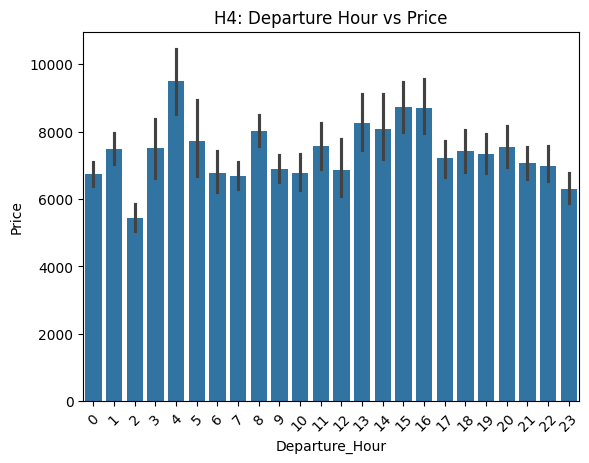

In [57]:
groups = []
for t in df['Departure_Hour'].unique():
    groups.append(df[df['Departure_Hour'] == t]['Price'].values)

from scipy.stats import f_oneway
stat, p_value = f_oneway(*groups)

cl = 0.95
alpha = 1 - cl

if p_value <= alpha:
    print("Reject Null Hypothesis. i.e There is relationship between variables")
else:
    print("Failed to reject Null Hypothesis. i.e There is no relationship between variables")

sns.barplot(x=df['Departure_Hour'], y=df['Price'])
plt.title('H4: Departure Hour vs Price')
plt.xticks(rotation=45);

#### Conclusion for Hypothesis 4:
**Decision:** Reject/Fail to Reject Null Hypothesis. 

**Statistical Conclusion:**
If p ≤ α → There is a significant difference in prices across times of day.
Else → No significant evidence of time differences in pricing.

**Business Insight:**
Airlines may charge differently for red-eye (late-night), peak business hours, or evening travel demand.
Time slot pricing is a real airline practice influenced by convenience, demand, and business travel patterns.

### Hypothesis 5 (Two-Way ANOVA)

**Question:**
Do airline and flight duration jointly influence ticket prices?

**Null Hypothesis (H0):**
Airline and duration have no effect on ticket prices.

**Alternate Hypothesis (H1):**
Airline or duration or their interaction affects ticket prices.

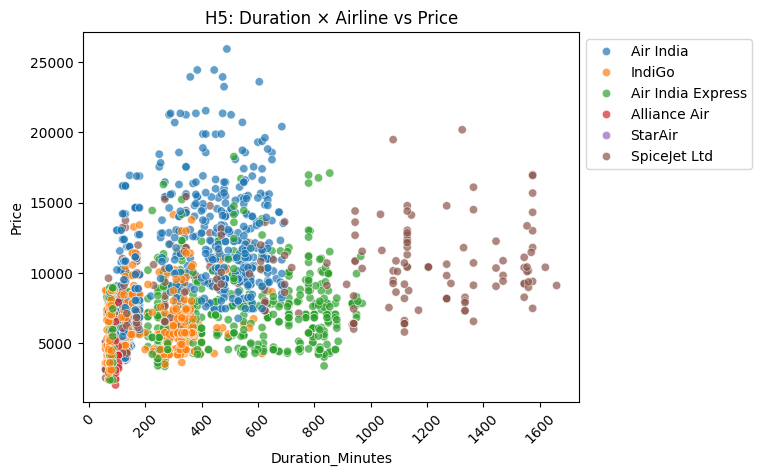

In [58]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('Price ~ C(Airline) + Duration_Minutes + C(Airline):Duration_Minutes', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sns.scatterplot(x=df['Duration_Minutes'], y=df['Price'], hue=df['Airline'], alpha=0.7)
plt.title('H5: Duration × Airline vs Price')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))

#### Conclusion for Hypothesis 5:

**Decision:**
Reject Null Hypothesis.

**Statistical Conclusion:**
Airline has a significant effect on ticket prices.

Duration has a significant effect on ticket prices.

The interaction between Airline and Duration is also significant.

This indicates that flight duration and airline choice do not operate independently on pricing.
Instead, different airlines adjust prices differently as flight duration changes.

## Conclusion:

### What We Observed (Overall Market Behavior)
- Flight prices are not uniform; they fluctuate significantly across airlines, routes, day types, and departure hours.
- Price distribution is right-skewed: a small portion of flights are extremely expensive.
- Weekend flights tend to show higher variability than weekdays.
- Airlines differ in pricing strategies (premium vs low-cost carriers).
- Route competitiveness and travel demand heavily influence fares.
- Duration affects price, but not strictly linearly.
- Time-of-day introduces price bands (morning vs evening vs night).

### Interpretation
Airlines do not price flights randomly.  
Pricing reflects a combination of:
- demand cycles,
- travel purpose (business vs leisure),
- competition on specific routes,
- operational time preferences,
- and revenue optimization strategies.

### Business Insight for Saran
Saran should not assume that all flights cost roughly the same.  
Timing, airline choice, and route selection matter more than intuition suggests.

---

## Bivariate + Multivariate EDA — Key Learnings

### Price vs Airline
Premium/full-service airlines (e.g., Air India) price consistently higher than low-cost carriers (IndiGo, SpiceJet).

**Interpretation:**  
Brand positioning and service model influence fare.

### Price vs Route
Some routes carry price premiums due to demand and limited competition.

**Interpretation:**  
Route elasticity is a major pricing driver in flights.

### Price vs Weekend/Weekday
Weekend flights show wider variability and higher peaks.

**Interpretation:**  
Leisure travel increases weekend demand.

### Price vs Time-of-Day
Morning and evening peaks align with business + leisure patterns.  
Night slots behave differently due to lower convenience.

**Interpretation:**  
Airlines monetize convenience windows.

### Duration vs Price
Longer durations increase price, but not proportionally.

**Interpretation:**  
Not all flight minutes are priced equally.

---

## Hypothesis Validation (EDA → Statistics)

EDA suggested patterns. Hypothesis testing confirmed whether they were real:

- **H1 (Weekend vs Weekday):** Significant difference (Reject H0)
- **H2 (Airline vs Price):** Airlines price differently (Reject H0)
- **H3 (Route vs Price):** Routes differ significantly (Reject H0)
- **H4 (Time-of-Day vs Price):** Time-of-day impacts pricing (Reject H0)
- **H5 (Airline × Duration):** Joint effect exists (Reject H0)

### Interpretation
What we saw visually was not random — patterns are statistically valid.

---

## Final Business Insights (Directly Answering Saran’s Questions)

**“Do airlines really price differently?”**  
→ Yes. Premium > Low-cost consistently.

**“Do weekends actually cost more?”**  
→ Yes, statistically confirmed.

**“Does route matter?”**  
→ Strongest price driver; business corridors cost more.

**“Is it cheaper to fly at certain times?”**  
→ Yes. Mid-day and late-night can offer cheaper fares.

**“Does flight duration always mean higher price?”**  
→ Mostly, but diminishing returns exist.

---

## Final Recommendations 

For a price-conscious traveler like Saran:

✔ Prefer **weekday flights** over weekends  
✔ Compare **airlines** rather than assuming equal fare  
✔ Avoid high-demand **business routes** when flexible  
✔ Consider **mid-day or late-night** slots for better pricing  
✔ Low-cost carriers offer best value for short domestic routes  
✔ Do not assume duration = quality; price is revenue-optimized  

---

### Final Conclusion
Analysis shows airline, route, duration and stop count significantly influence pricing. Statistical significance aligned with visual trends, confirming observed relationships are not random. Outliers represent real market spikes rather than data errors and were retained intentionally for domain relevance.

